# Classifying heatmaps
They extract a bunck of features (28) from each heatmap, and then classify it based on random forest. Examples are:
* percentage of tumor region over the whole tissue region, 
* area ratio between tumor region and the minimum surrounding convex region
* average prediction values
* longest axis of the tumor region

In [63]:
import os
import sys
import glob
import random
import pickle
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Add the src directory for functions
src_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'src')
print(src_dir)
sys.path.append(src_dir)

PATH = '/media/rene/Data/camelyon_out/heatmaps/inception_v3_r1'

/media/rene/Data/camelyon/src


(738, 327, 2)
53784.533994894475
398107.7248727456
-160.9815673828125
156.83749389648438


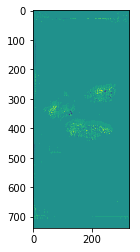

In [64]:
heatmap_loc = PATH+'/train/'+ 'normal29heatmap.npy'#'normal100heatmap.npy'
heatmap = np.load(heatmap_loc)
print(heatmap.shape)
plt.figure()
plt.imshow(heatmap[:, :, 0])
print(np.sum(heatmap[:300, :, 1]))
print(np.sum(heatmap[:, :, 0]))
print(np.amin(heatmap[:, :, 0]))
print(np.amax(heatmap[:, :, 0]))

In [65]:
def make_softmax(heatmap):
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    points = np.where(heatmap!=0)
    
    for idx in range(len(points[0])):
        heatmap[points[0][idx], points[1][idx], :] = softmax(heatmap[points[0][idx], points[1][idx], :])

Identifying Metastatic Breast Cancer using Deep Texture Representation  Team MIL-GPAT

Features:
* Tumor area in the largest region with threshold t = {0.5, 0.7 0.9}
* Major axis length of the largest region with threshold t = {0.5, 0.7 0.9}
* Eccentricity of the largest region with threshold t = {0.5, 0.7 0.9}
* Mean probability of the largest region with threshold t = {0.5, 0.7 0.9}
* The number of  region with threshold t = {0.5, 0.7 0.9}

### False positive bootstrapping
* Add prevoiusly faslely classified examples to a bbiased training set for further training


### Color augmnetation (google paper)
brightness with a maximum delta of 64/255, saturation with a maximum delta of 0.25, hue with a maximum delta of 0.04, and contrast with a maximum delta of 0.75.

## Making features:
Some example code: https://github.com/arjunvekariyagithub/camelyon16-grand-challenge/blob/master/camelyon16/postprocess/extract_feature_heatmap.py

http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html

In [71]:
heatmap_loc = PATH+'/train/'+ 'normal29heatmap.npy'#'normal100heatmap.npy'
heatmap = np.load(heatmap_loc)
make_softmax(heatmap)


def make_features(heatmap, threshold_list = [.5, .7, .9]):
    """return a list of features"""
    heatmap_masks = {threshold:[heatmap>threshold]  for threshold in threshold_list}
    features = []
    
    for threshold, threshold_mask in heatmap_masks.items():
        # number of regions
        features.append(np.sum(threshold_mask))
        # mean region probability
        features.append(np.sum(threshold_mask))
 
    
    
    

In [72]:
print(heatmap_masks)

{0.5: [array([[[False, False],
        [False, False],
        [ True, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       ...,

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False],
        ...,
        [False, False],
        [False, False],
        [False, False]]])], 0.7: [array([[[False, Fa